In [21]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from loguru import logger
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
df.head()
df.dtypes

timestamp             datetime64[ns, UTC]
message                            object
author                             object
has_emoji                            bool
is_topk                              bool
message_length                      int64
has_link                             bool
timestamp_category               category
hour                               object
day_of_week                         int32
msg_length                          int64
dtype: object

# Example User Stories & Correlations

In [ ]:
print(df.dtypes)


In [ ]:
# df["hour"] = pd.to_numeric(df["hour"], errors="coerce")
# df["msg_length"] = pd.to_numeric(df["msg_length"], errors="coerce")
# df.dtypes

In [ ]:
# df = df.dropna(subset=["hour", "msg_length"])

In [ ]:
# I have a whatsapp group export with a dataset layout like this:
# ['timestamp', 'message', 'author', 'has_emoji', 'is_topk',
#        'message_length', 'has_link', 'timestamp_category', 'hour',
#        'day_of_week', 'msg_length']

# I want to create a relationship plot with seaborn for this group app, give me suggestions

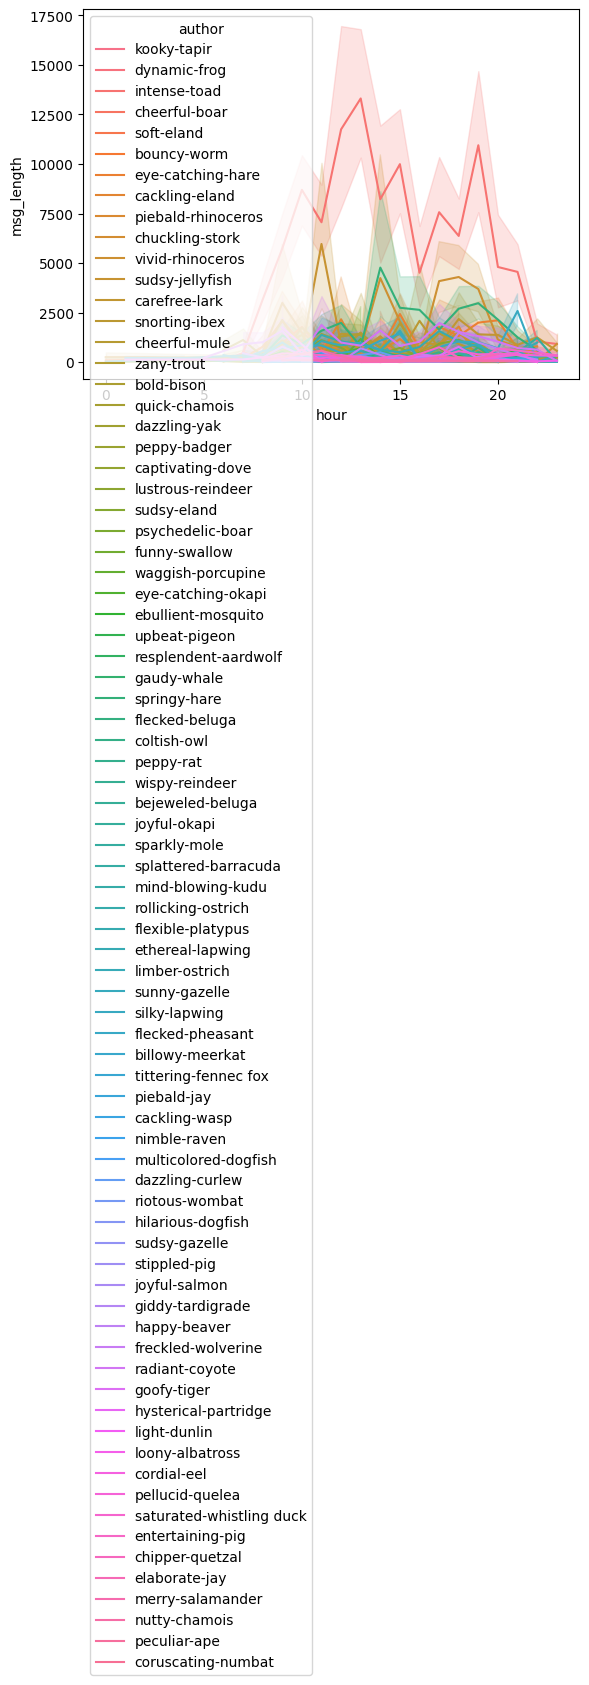

In [ ]:
# Activity Patterns
# Hourly activity per author
# Shows which hours of the day different members are most active.

# Ensure correct columns
df["hour"] = df["timestamp"].dt.hour
df["msg_length"] = df["message_length"].astype(int)

# Now plot
sns.lineplot(
    data=df,
    x="hour",
    y="msg_length",
    hue="author",
    estimator="sum"
)
plt.show()



<Axes: xlabel='hour', ylabel='day_of_week'>

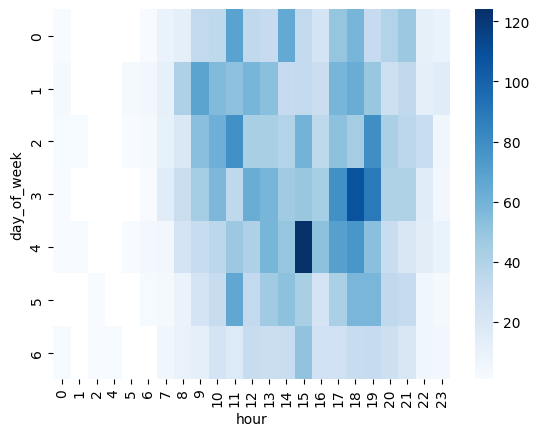

In [ ]:
# Day-of-week heatmap
# Reveals group activity rhythms across the week.

pivot = df.pivot_table(index="day_of_week", columns="hour", values="message", aggfunc="count")
sns.heatmap(pivot, cmap="Blues")


# 2. Author Behavior

<Axes: xlabel='message_length', ylabel='hour'>

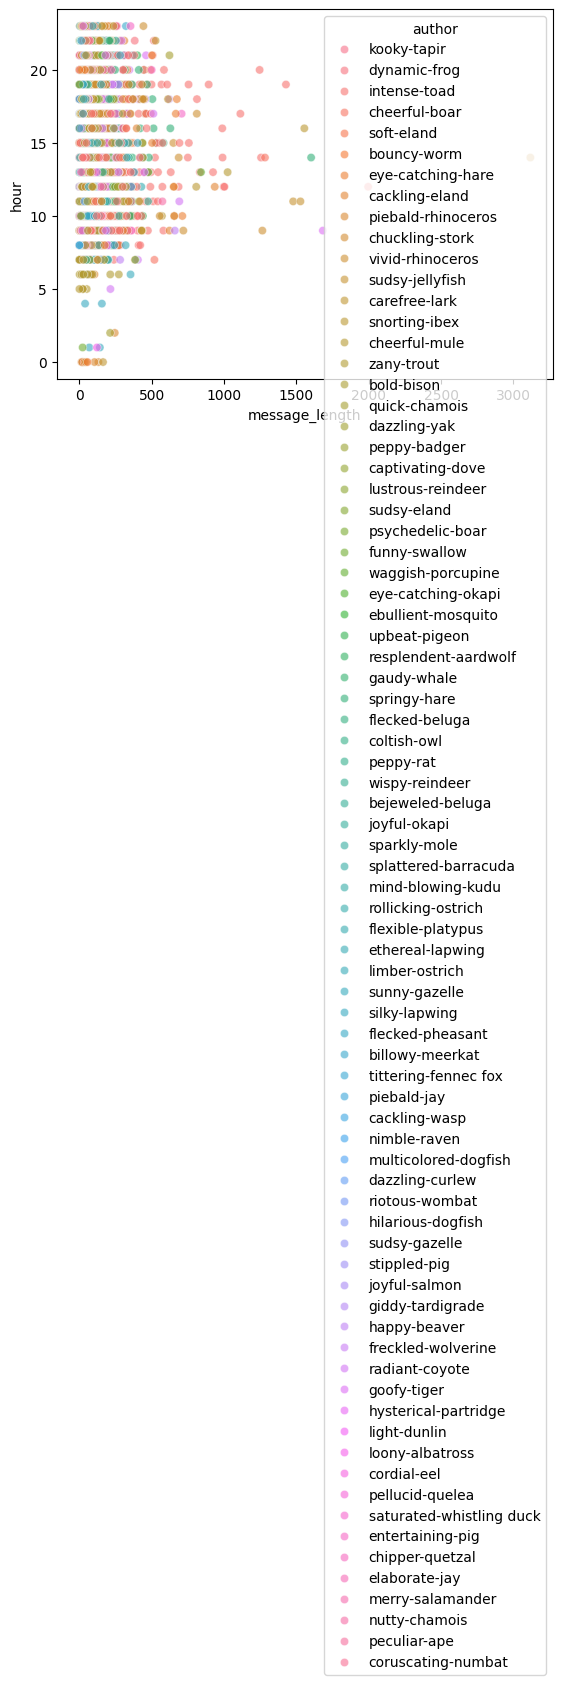

In [ ]:
# Message length vs. frequency
# 
# Shows if there's a correlation between message length and time of day, differentiated by author.
# 
sns.scatterplot(data=df, x="message_length", y="hour", hue="author", alpha=0.6)


<Axes: xlabel='is_topk', ylabel='message_length'>

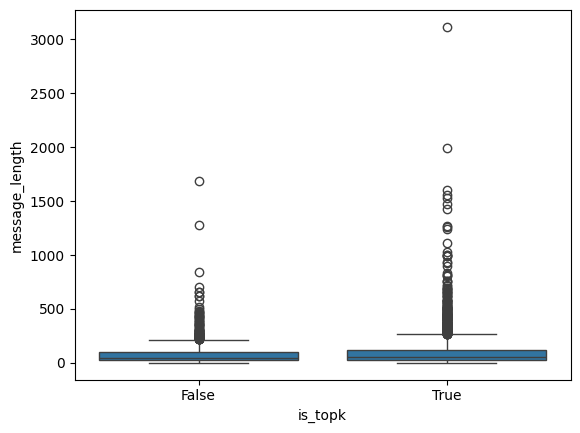

In [27]:
# Top contributors vs others
sns.boxplot(data=df, x="is_topk", y="message_length")


<Axes: xlabel='author', ylabel='count'>

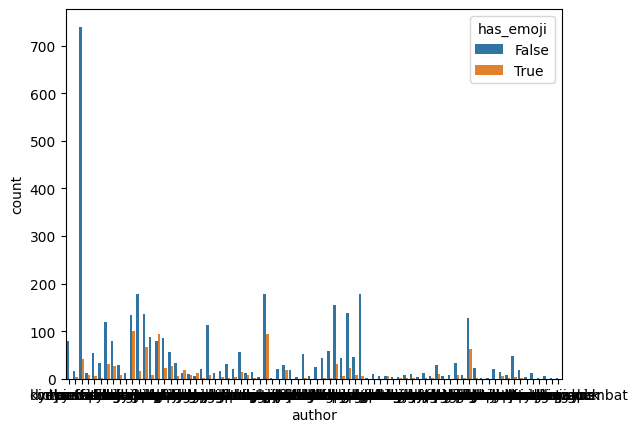

In [28]:
sns.countplot(data=df, x="author", hue="has_emoji")


<Axes: xlabel='has_link', ylabel='message_length'>

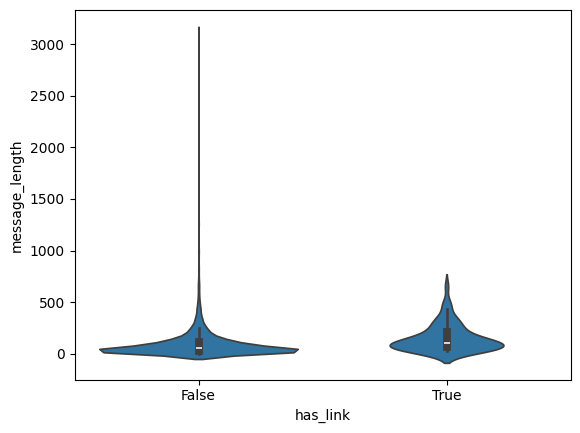

In [29]:
sns.violinplot(data=df, x="has_link", y="message_length")


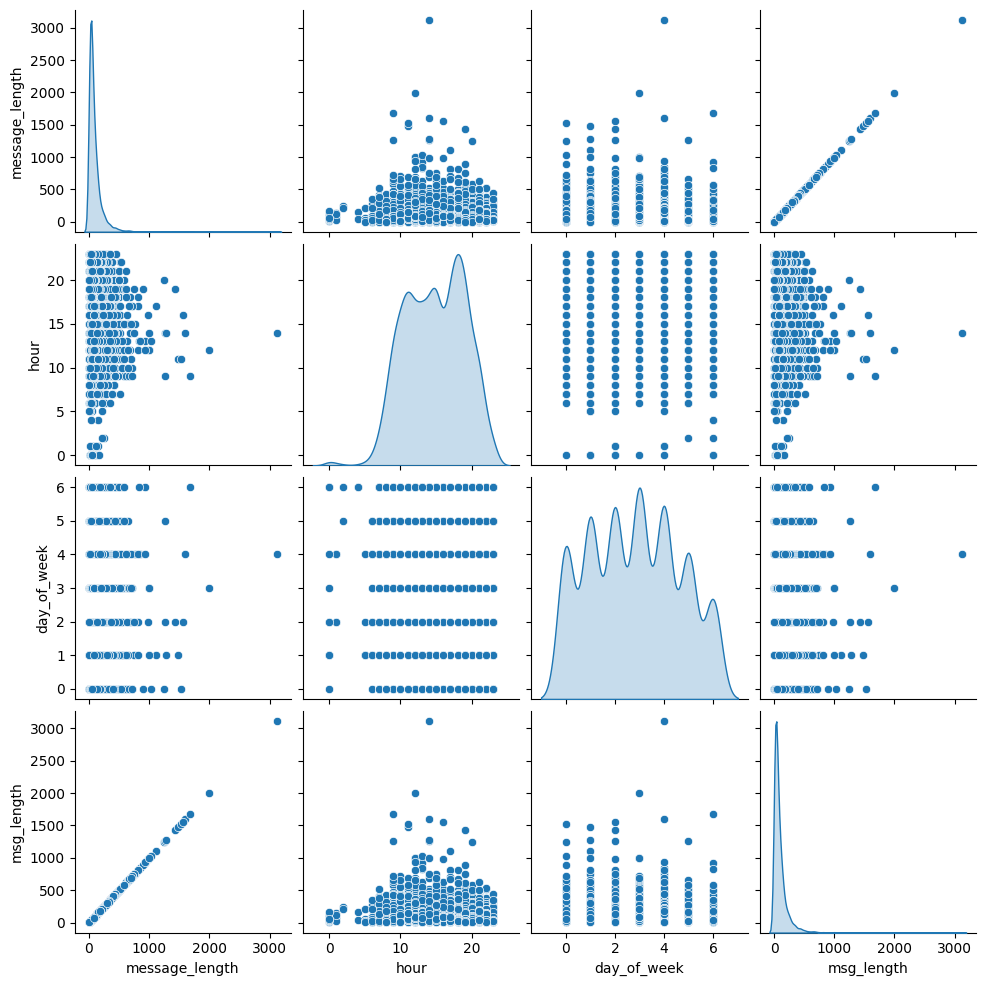

In [30]:
sns.pairplot(df[["message_length", "hour", "day_of_week", "msg_length"]], diag_kind="kde")


<Axes: >

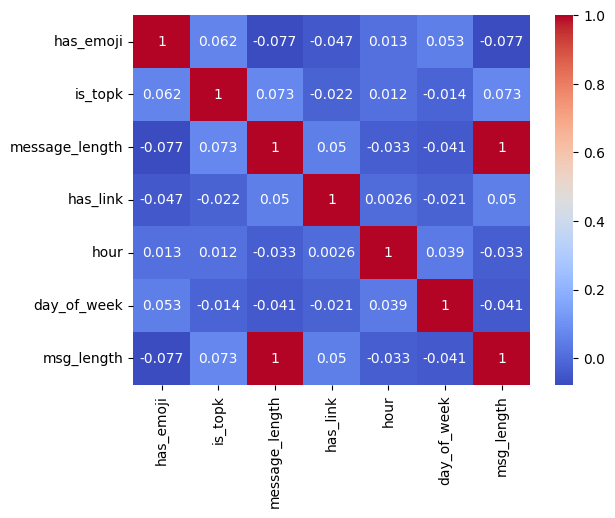

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


<Axes: xlabel='timestamp', ylabel='message_length'>

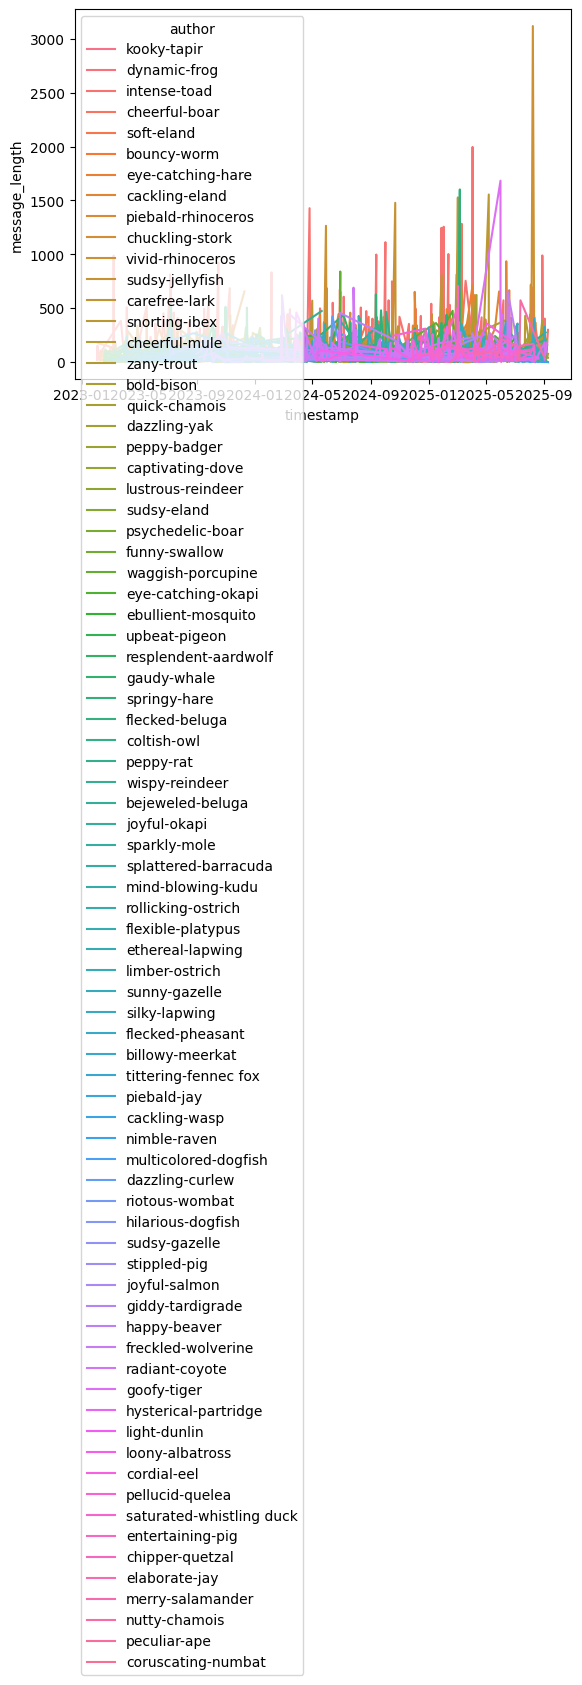

In [32]:
sns.lineplot(data=df, x="timestamp", y="message_length", hue="author")


<Axes: xlabel='timestamp', ylabel='messages'>

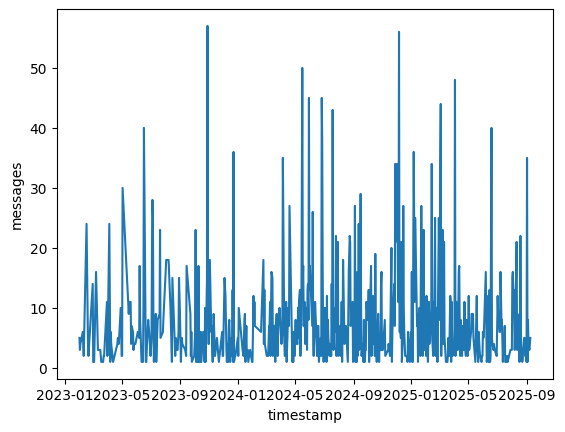

In [33]:
# Make sure timestamp is datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Aggregate per day
daily = (
    df.groupby(df["timestamp"].dt.date)
      .agg(messages=("message", "count"),
           avg_length=("message_length", "mean"))
      .reset_index()
)

# Plot messages per day
sns.lineplot(data=daily, x="timestamp", y="messages")


<Axes: xlabel='author', ylabel='total_msgs'>

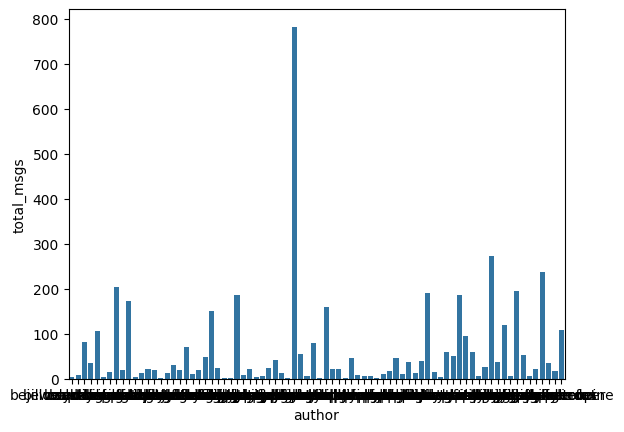

In [34]:
author_stats = (
    df.groupby("author")
      .agg(total_msgs=("message", "count"),
           avg_length=("message_length", "mean"),
           emoji_share=("has_emoji", "mean"))
      .reset_index()
)

# Barplot of total messages
sns.barplot(data=author_stats, x="author", y="total_msgs")


<Axes: xlabel='timestamp', ylabel='total_msgs'>

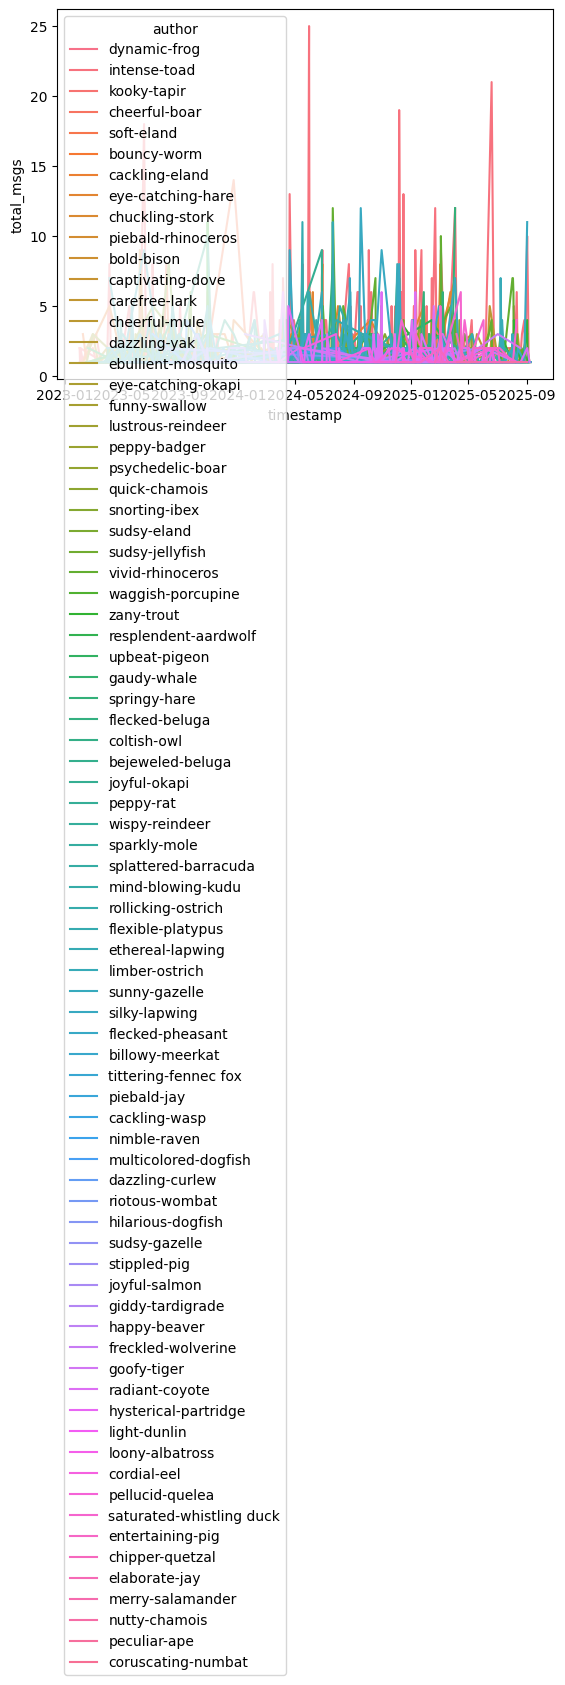

In [35]:
daily_author = (
    df.groupby([df["timestamp"].dt.date, "author"])
      .agg(total_msgs=("message", "count"))
      .reset_index()
)

sns.lineplot(data=daily_author, x="timestamp", y="total_msgs", hue="author")
